In [1]:
%run ./'01 load.ipynb'
pd.options.display.float_format = '{0:,.0f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_rows = 100

In [2]:
len_predictions = 30
rate_death = 0.04014563012 # global as of 2020-03-18
rate_death = 0.008 # luca
rate_icu = 0.14
start_date = '2020-02-12'

In [3]:
germany = df[df['country'] == 'Germany']
# germany = df.groupby('date').sum().reset_index() # world
dates_new = pd.date_range(germany['date'].iloc[-1], periods=len_predictions)
df_new = pd.DataFrame(dates_new[1:], columns=['date'])
germany = germany.append(df_new, ignore_index=True)
germany['date_string'] = germany['date'].dt.strftime('%d. %b')

In [4]:
germany['growth'] = germany['confirmed'].pct_change() * 100

In [5]:
len_before_start = (germany['date'] < start_date).sum()
len_after_start = (germany['date'] >= start_date).sum()

In [6]:
# germany.at[56, 'confirmed'] = 14481

In [7]:
# prepare machine learning magic
y = germany.iloc[len_before_start:]['confirmed'].dropna()
x = list(range(len(y)))
# machine learning magic
from scipy.optimize import curve_fit
def func(x, a, d):
    return a**x + d
popt, pcov = curve_fit(func, x, y)
print(*popt)
print(*pcov)

1.3089580785736865 35.685719479081044
[ 1.02151942e-07 -3.60890179e-03] [-3.60890179e-03  6.89216405e+02]


In [8]:
# get x values from predictor
predict = []
for i in range(len_after_start+len_predictions):
    prediction = func(i, *popt)
    prediction = 0 if prediction < 0 else round(prediction, -2)
    predict.append(prediction)
germany = germany.join(pd.DataFrame(enumerate(predict, len_before_start), columns=['id', 'predict']).set_index('id'))    

In [9]:
# predict deaths based on prediction of cases and death rate (see top)
germany['predict_deaths'] = germany['predict'] * rate_death
germany['predict_icu'] = germany['predict'] * rate_icu

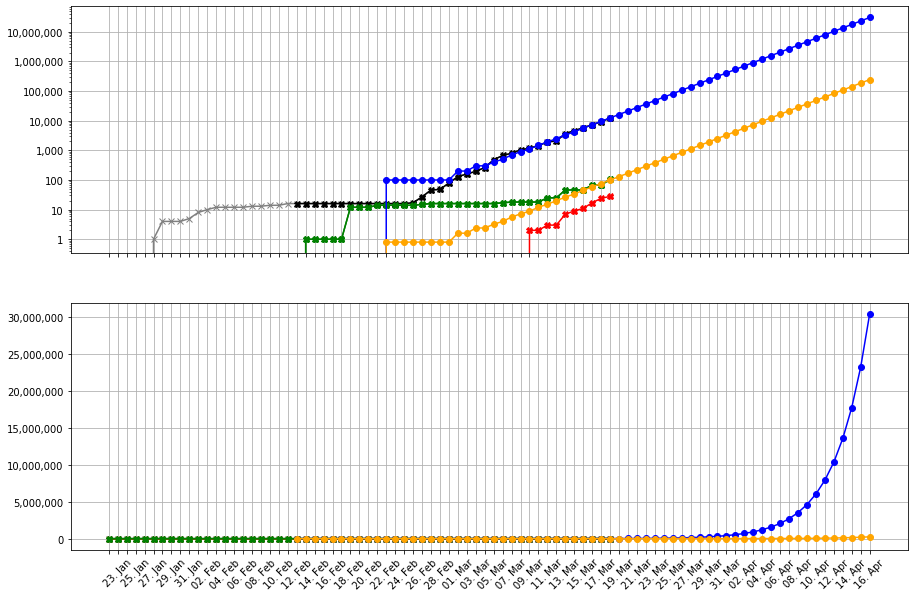

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker
format_y = matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
x = list(germany['date_string'])
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax1.grid(True)
ax1.plot(germany['date_string'], germany['confirmed'], marker='x', color='gray')
ax1.plot(germany['date_string'], germany['deaths'], marker='X', color='red')
ax1.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax1.plot(germany.iloc[len_before_start:]['date_string'], germany.iloc[len_before_start:]['confirmed'], marker='X', color='black')
ax1.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax1.plot(germany['date_string'], germany['predict'], marker='o', color='blue')
ax1.plot(germany['date_string'], germany['predict_deaths'], marker='o', color='orange')
ax1.set_xticklabels([])
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(format_y)
ax2 = fig.add_subplot(2,1,2)
ax2.grid(True)
ax2.plot(germany['date_string'], germany['confirmed'], marker='x', color='gray')
ax2.plot(germany['date_string'], germany['deaths'], marker='X', color='red')
ax2.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax2.plot(germany.iloc[len_before_start:]['date_string'], germany.iloc[len_before_start:]['confirmed'], marker='X', color='black')
ax2.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax2.plot(germany['date_string'], germany['predict'], marker='o', color='blue')
ax2.plot(germany['date_string'], germany['predict_deaths'], marker='o', color='orange')
ax2.set_xticklabels(labels=germany['date_string'], rotation=45)
ax2.yaxis.set_major_formatter(format_y)
for label in ax2.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

In [11]:
germany.iloc[-len_predictions-5:]

,country,date_string,confirmed,deaths,recovered,date,growth,predict,predict_deaths,predict_icu
51,Germany,13. Mar,"3,675",7,46,2020-03-13,77,"3,300",26,462
52,Germany,14. Mar,"4,585",9,46,2020-03-14,25,"4,200",34,588
53,Germany,15. Mar,"5,795",11,46,2020-03-15,26,"5,600",45,784
54,Germany,16. Mar,"7,272",17,67,2020-03-16,25,"7,300",58,"1,022"
55,Germany,17. Mar,"9,257",24,67,2020-03-17,27,"9,500",76,"1,330"
56,Germany,18. Mar,"12,327",28,105,2020-03-18,33,"12,400",99,"1,736"
57,NaN,19. Mar,nan,nan,nan,2020-03-19,0,"16,200",130,"2,268"
58,NaN,20. Mar,nan,nan,nan,2020-03-20,0,"21,200",170,"2,968"
59,NaN,21. Mar,nan,nan,nan,2020-03-21,0,"27,800",222,"3,892"
60,NaN,22. Mar,nan,nan,nan,2020-03-22,0,"36,400",291,"5,096"
